In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager
mpl.rcParams['font.family'] = 'EB Garamond Regular'

In [59]:
import re

def atoi(text):
    try:
        return int(text)
    except ValueError:
        return text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    '''    
    return [ atoi(c) for c in re.split('([-]?\d+)', text) ]

sorted(os.listdir("//dm11/turnerlab/Rishika/4Y-Maze/RunData/IntensitySweepOCT"), key=natural_keys, reverse=True)

['IntensitySweep-OCT-5-04_20_2022-16_55',
 'IntensitySweep-OCT-15-04_21_2022-19_07',
 'IntensitySweep-OCT-15-04_20_2022-21_52',
 'IntensitySweep-OCT-25-04_21_2022-21_29',
 'IntensitySweep-OCT-25-04_20_2022-23_39',
 'IntensitySweep-OCT-35-04_21_2022-15_22',
 'IntensitySweep-MCH-5-04_21_2022-00_56',
 'IntensitySweep-MCH-15-04_21_2022-02_07',
 'IntensitySweep-MCH-25-04_21_2022-13_26',
 'IntensitySweep-MCH-35-04_21_2022-17_27']

In [74]:
dfs = []
choice_mats = []
reward_mats = []
schedule_strings = []
id = []
for i in os.listdir("//dm11/turnerlab/Rishika/4Y-Maze/RunData/IntensitySweepOCT"):
    loadmat_file = f"//dm11/turnerlab/Rishika/4Y-Maze/RunData/IntensitySweepOCT/{i}/YArenaInfo.mat"
    dfs.append(loadmat(loadmat_file)['YArenaInfo'])
    cm = dfs[-1]['FlyChoiceMatrix'][0][0].T
    rm = dfs[-1]['FlyRewardMatrix'][0][0].T
    if i == 'IntensitySweep-OCT-25-04_20_2022-23_39' or i == 'IntensitySweep-OCT-15-04_20_2022-21_52':
        cm = cm[:-1,:]
        rm = rm[:-1,:]
    masks = ~np.isnan(cm).any(axis=1)
    cm = cm[masks]
    rm = rm[masks]
    choice_mats.append(cm)
    reward_mats.append(rm)
    for j in range(sum(masks)):
        schedule_strings.append(["{}/{}".format(round(i*10)/10, round(j*10)/10) for i,j in zip(dfs[-1]['Odor2_RewardProbability'][0][0][0], dfs[-1]['Odor1_RewardProbability'][0][0][0])])
        id.append(i)
action_set = np.concatenate(choice_mats)
reward_set = np.concatenate(reward_mats)

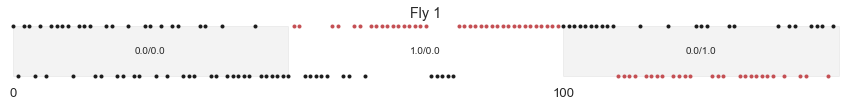

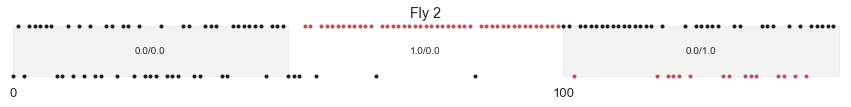

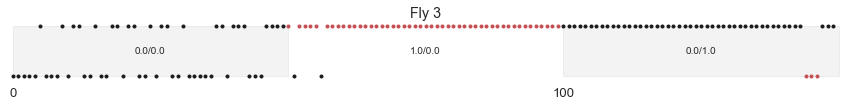

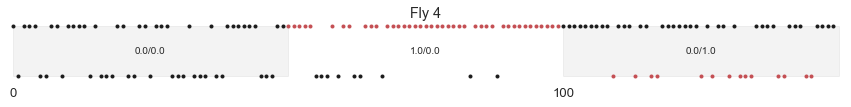

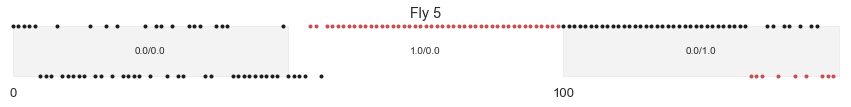

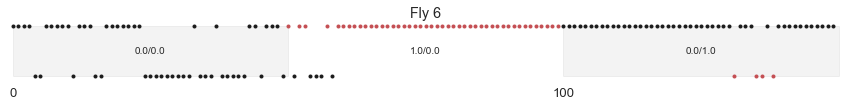

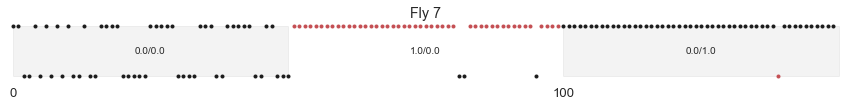

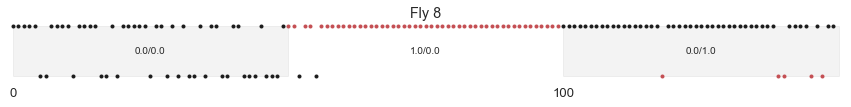

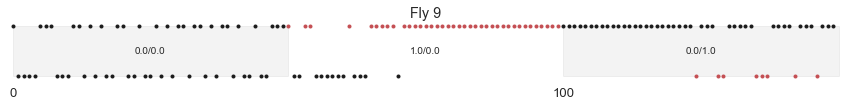

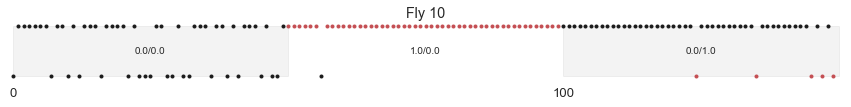

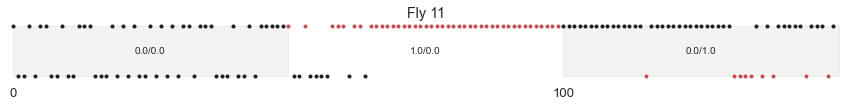

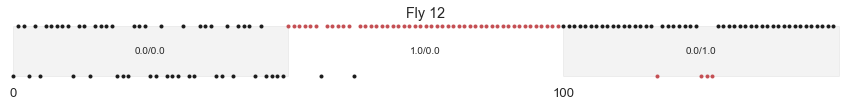

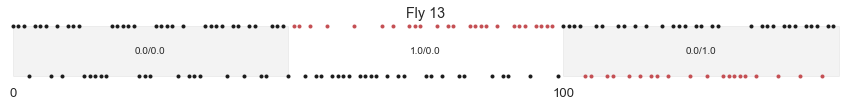

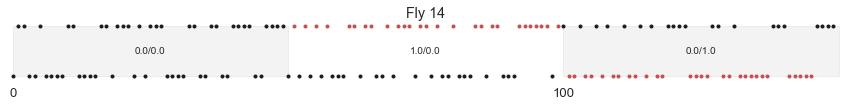

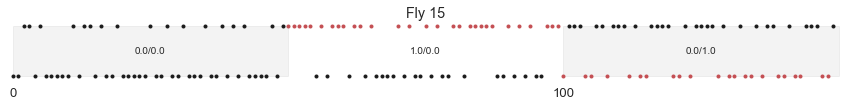

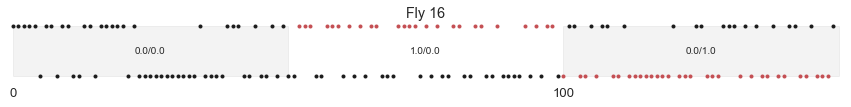

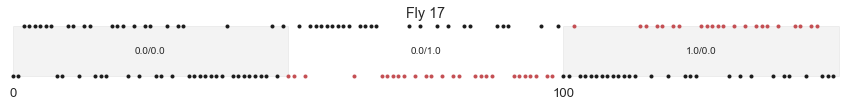

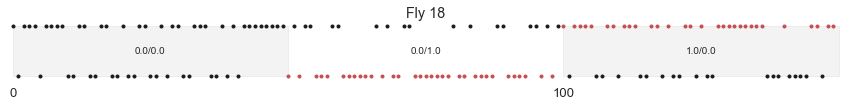

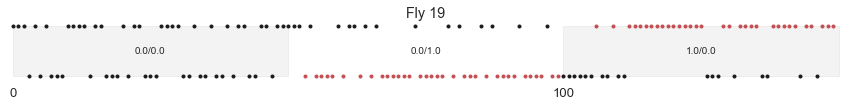

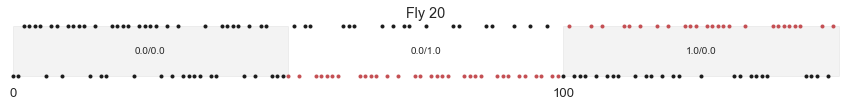

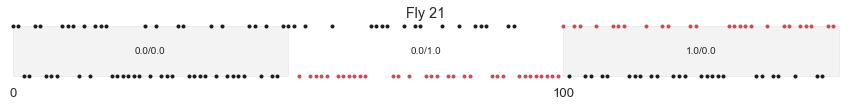

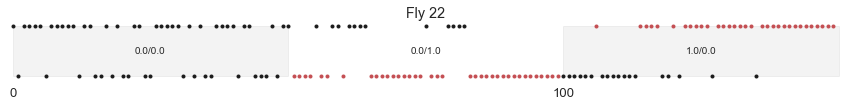

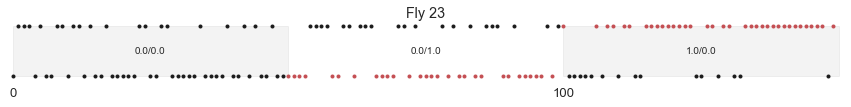

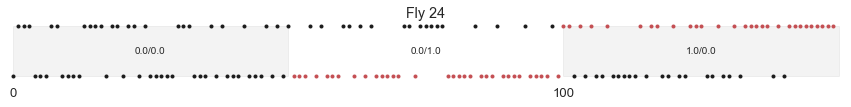

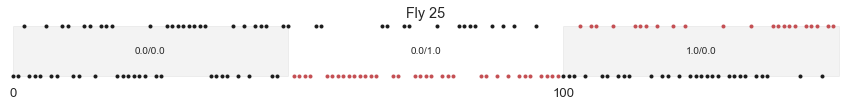

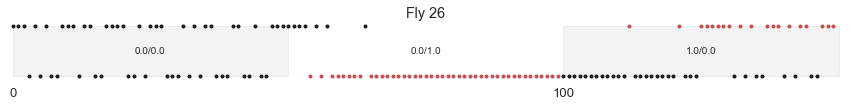

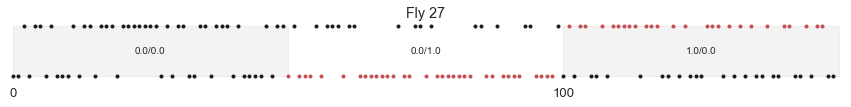

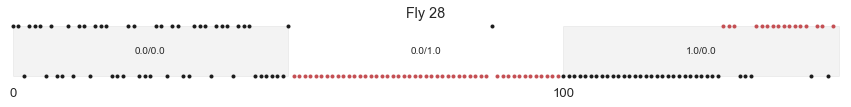

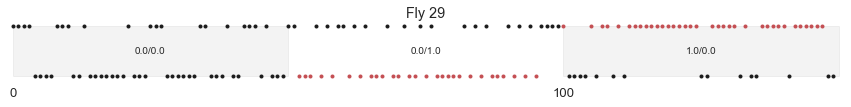

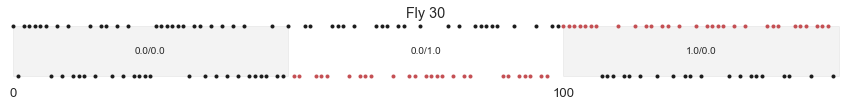

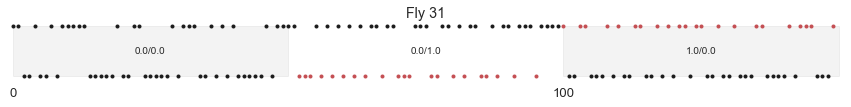

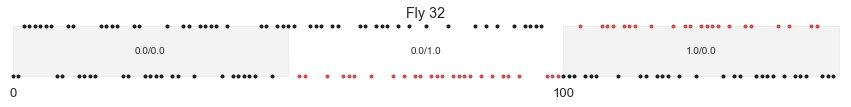

In [75]:
for t in range(len(action_set)):
    plt.figure(figsize=(15, 1))
    for i in range(150):
        if reward_set[t, i] == 1:
            plt.plot(i, action_set[t, i], 'r.')
        else:
            plt.plot(i, action_set[t, i], 'k.')
    plt.fill_betweenx([0, 1], 0, 50, alpha=0.05,color='k')
    plt.fill_betweenx([0, 1], 100, 150, alpha=0.05,color='k')
    for n,i in enumerate([25,75, 125]):
        plt.text(i, 0.5, schedule_strings[t][n], horizontalalignment='center', verticalalignment='center', fontsize=10)
    plt.box(False)
    plt.yticks([])
    plt.xticks([0,100,200])
    plt.xlim([-1,151])
    plt.title('Fly {}'.format(t+1))
    plt.show()
    print('\n')

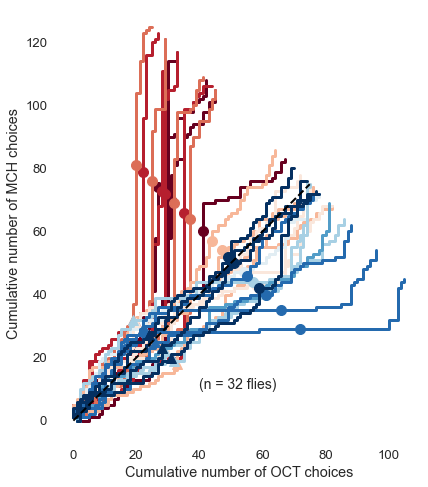

In [76]:
import matplotlib as mpl
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(7,7))
idx = np.unique(id,return_inverse=True)[1]
for n in range(len(action_set)):
    plt.plot(np.cumsum(action_set[n]==0),np.cumsum(action_set[n]==1),'-',color=plt.cm.RdBu(idx[n]/np.max(idx)),alpha=1,linewidth=3, label=id[n] if n%4==0 else None)
    plt.plot(np.cumsum(action_set[n]==0)[50],np.cumsum(action_set[n]==1)[50],'^',color=plt.cm.RdBu(idx[n]/np.max(idx)),markersize=10,alpha=1)
    plt.plot(np.cumsum(action_set[n]==0)[100],np.cumsum(action_set[n]==1)[100],'o',color=plt.cm.RdBu(idx[n]/np.max(idx)),markersize=10,alpha=1)
plt.plot([0,len(action_set[0])//2],[0,len(action_set[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(action_set)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
# plt.plot([],[],'^',color='green',label='Rewarded trials start')
# plt.legend(frameon=False)
# plt.colorbar(label='Optogenetic intensity',ticks=[0,0.5,1])

plt.tight_layout()
plt.savefig('OctLearningTest.png',dpi=300,transparent=True)
plt.show()

### Octanol Learning

In [146]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-12_05/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-14_12/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_31_2022-18_31/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']

In [147]:
histories1 = df1['FlyChoiceMatrix'][0][0].T
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0]], [df1['RewardStateTallyOdor2'][0][0]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,2]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,2]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,2]]]], axis=0).transpose((2, 1, 0))
histories = np.concatenate([histories1, histories2, histories3], axis=0)
schedules = np.concatenate([schedules1, schedules2, schedules3], axis=0)

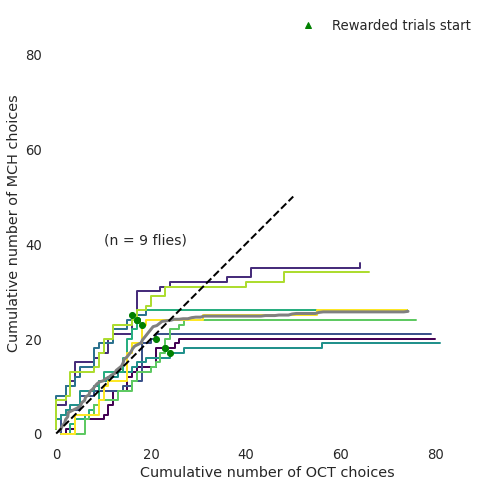

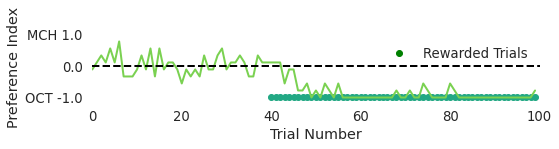

In [162]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)

plt.figure(figsize=(7,7))
for n in range(9):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/8),alpha=1,linewidth=2)
    plt.plot(np.cumsum(histories[n]==0)[40],np.cumsum(histories[n]==1)[40],'o',color='green')
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray')
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(10,40,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.xlim([-1,90])
plt.ylim([-1,90])
plt.box(False)
plt.gca().set_aspect('equal')
plt.plot([],[],'^',color='green',label='Rewarded trials start')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('OctLearningTest.svg',transparent=True)
plt.show()


i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.plot([],[],'o',color='green',label='Rewarded Trials')
plt.yticks([0,0.5,1],["OCT -1.0","0.0","MCH 1.0"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial Number')
plt.ylabel('Preference Index')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('OctLearningTest-schedules.svg',transparent=True)
plt.show()


In [149]:
positions = df1['FlyCentroidsMatrix'][0][0]
nan_filter = ~np.all(np.all(np.isnan(positions),axis=0),axis=0)
positions = positions[:,:,nan_filter]
arena_mask = df1['MaskStack'][0][0].reshape((1024,1280,4,3)).sum(axis=3)
cleaned_positions = np.nan*np.ones(positions.shape)
cleaned_trials = df1['TrialCounterMatrix'][0][0].T[:,nan_filter]
cleaned_times = df1['TimeStampMatrix'][0][0].T[:,nan_filter][0]

In [150]:
for frame in range(positions.shape[2]):
    for blob in range(positions.shape[1]):
        i,j = np.int32(positions[:,blob,frame])
        if i>0 and i<1024 and j>0 and j<1280:
            arena = np.arange(4)[arena_mask[j,i,:]==1]
            if len(arena)==1:
                arena = arena[0]
                cleaned_positions[:,arena,frame] = positions[:,blob,frame]

C:\Users\labadmin\AppData\Local\Temp/ipykernel_21480/769735205.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\labadmin\AppData\Local\Temp/ipykernel_21480/769735205.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\labadmin\AppData\Local\Temp/ipykernel_21480/769735205.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\labadmin\AppData\Local\Temp/ipykernel_21480/769735205.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be remove

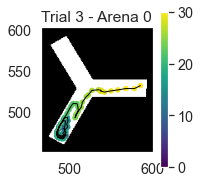

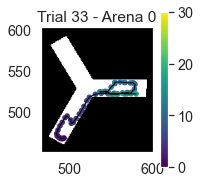

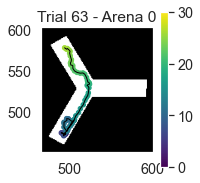

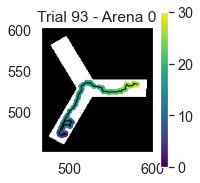

In [156]:
sns.set(style="ticks")
sns.set(font_scale=1.3)
trial_no = 1
arena_no = 0
for trial_no in [3, 33, 63, 93]:
    plt.figure(figsize=(3,3))
    frames = cleaned_trials[arena_no,:]==trial_no
    times = cleaned_times[frames] - cleaned_times[frames][0]
    plt.imshow(arena_mask[:,:,arena_no],cmap='gray',vmin=0,vmax=1)
    plt.plot(cleaned_positions[0,arena_no,frames],cleaned_positions[1,arena_no,frames],'-',color='black',linewidth=1)
    plt.scatter(cleaned_positions[0,arena_no,frames],cleaned_positions[1,arena_no,frames],c=times,s=20,cmap='viridis',vmin=0,vmax=30)
    plt.gca().set_aspect('equal')
    plt.colorbar()
    buffer = 10
    ylim1 = np.min(np.argmax(arena_mask[:,:,arena_no],axis=0)[np.argmax(arena_mask[:,:,arena_no],axis=0)>0]) - buffer
    xlim1 = np.min(np.argmax(arena_mask[:,:,arena_no],axis=1)[np.argmax(arena_mask[:,:,arena_no],axis=1)>0]) - buffer
    ylim2 = 1280-np.min(np.argmax(arena_mask[:,::-1,arena_no],axis=1)[np.argmax(arena_mask[:,::-1,arena_no],axis=1)>0]) + buffer
    xlim2 = 1024-np.min(np.argmax(arena_mask[::-1,:,arena_no],axis=0)[np.argmax(arena_mask[::-1,:,arena_no],axis=0)>0]) + buffer
    plt.xlim([xlim1,xlim2])
    plt.ylim([ylim1,ylim2])
    plt.grid(False)
    plt.title(f"Trial {trial_no} - Arena {arena_no}")
    plt.tight_layout()
    plt.savefig(f"OCTLearning_Trial{trial_no}-Arena{arena_no}.svg",transparent=True)

### Methycyclohexanol Learning

In [97]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_23_2022-15_50/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_24_2022-10_35/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_31_2022-17_10/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']

In [98]:
histories1 = df1['FlyChoiceMatrix'][0][0].T[[0,2]]
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0][:,[0,2]]], [df1['RewardStateTallyOdor2'][0][0][:,[0,2]]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,1,3]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,1,3]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,1,3]]]], axis=0).transpose((2, 1, 0))
histories = np.concatenate([histories1, histories2, histories3], axis=0)
schedules = np.concatenate([schedules1, schedules2, schedules3], axis=0)

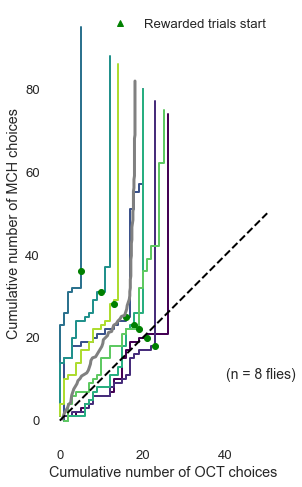

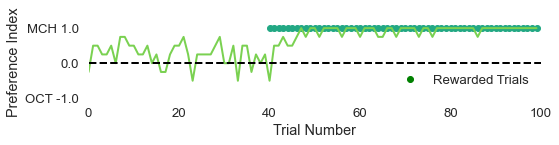

In [100]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(8):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/8),alpha=1,linewidth=2)
    plt.plot(np.cumsum(histories[n]==0)[40],np.cumsum(histories[n]==1)[40],'o',color='green')
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray')
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.plot([],[],'^',color='green',label='Rewarded trials start')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('MchLearningTest.svg',transparent=True)
plt.show()


i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.plot([],[],'o',color='green',label='Rewarded Trials')
plt.yticks([0,0.5,1],["OCT -1.0","0.0","MCH 1.0"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial Number')
plt.ylabel('Preference Index')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('MchLearningTest-schedules.svg',transparent=True)
plt.show()


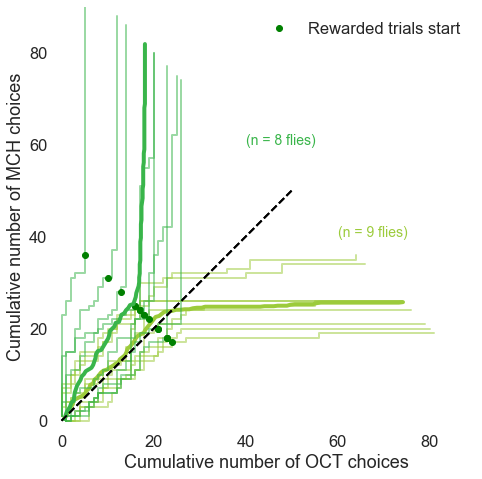

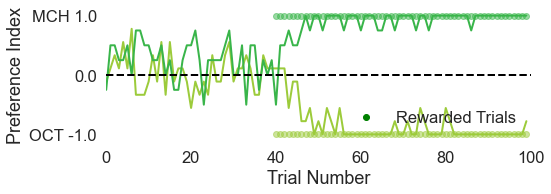

In [8]:
import seaborn as sns

loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-12_05/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-14_12/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_31_2022-18_31/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']
histories1 = df1['FlyChoiceMatrix'][0][0].T
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0]], [df1['RewardStateTallyOdor2'][0][0]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,2]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,2]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,2]]]], axis=0).transpose((2, 1, 0))
histories_o = np.concatenate([histories1, histories2, histories3], axis=0)
schedules_o = np.concatenate([schedules1, schedules2, schedules3], axis=0)


loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_23_2022-15_50/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_24_2022-10_35/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_31_2022-17_10/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']
histories1 = df1['FlyChoiceMatrix'][0][0].T[[0,2]]
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0][:,[0,2]]], [df1['RewardStateTallyOdor2'][0][0][:,[0,2]]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,1,3]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,1,3]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,1,3]]]], axis=0).transpose((2, 1, 0))
histories_m = np.concatenate([histories1, histories2, histories3], axis=0)
schedules_m = np.concatenate([schedules1, schedules2, schedules3], axis=0)

sns.set(style="ticks")
sns.set(font_scale=1.5)
plt.figure(figsize=(7,7))


for n in range(len(histories_o)):
    plt.plot(np.cumsum(histories_o[n]==0),np.cumsum(histories_o[n]==1),'-',color='#9ccb3b',alpha=0.5,linewidth=2)
    plt.plot(np.cumsum(histories_o[n]==0)[40],np.cumsum(histories_o[n]==1)[40],'o',color='green')
plt.plot(np.cumsum(histories_o==0,axis=1).mean(axis=0),np.cumsum(histories_o==1,axis=1).mean(axis=0),linewidth=4,color='#9ccb3b')
plt.plot([0,len(histories_o[0])//2],[0,len(histories_o[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(60,40,f"(n = {len(histories_o)} flies)",fontsize=14,color='#9ccb3b')

for n in range(len(histories_m)):
    plt.plot(np.cumsum(histories_m[n]==0),np.cumsum(histories_m[n]==1),'-',color='#39b54a',alpha=0.5,linewidth=2)
    plt.plot(np.cumsum(histories_m[n]==0)[40],np.cumsum(histories_m[n]==1)[40],'o',color='green')
plt.plot(np.cumsum(histories_m==0,axis=1).mean(axis=0),np.cumsum(histories_m==1,axis=1).mean(axis=0),linewidth=4,color='#39b54a')
plt.plot([0,len(histories_m[0])//2],[0,len(histories_m[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,60,f"(n = {len(histories_m)} flies)",fontsize=14, color='#39b54a')

plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.xlim([-1,90])
plt.ylim([-1,90])
plt.box(False)
plt.gca().set_aspect('equal')
plt.plot([],[],'o',color='green',label='Rewarded trials start')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('LearningTest.svg',transparent=True)
plt.show()


plt.figure(figsize=(8,3))
i = schedules_o[0]
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color='#9ccb3b',linewidth=2,alpha=0.5)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color='#9ccb3b',linewidth=2,alpha=0.5)
plt.plot(histories_o.mean(axis=0),'-',color='#9ccb3b',linewidth=2)
i = schedules_m[0]
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color='#39b54a',linewidth=2,alpha=0.5)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color='#39b54a',linewidth=2,alpha=0.5)
plt.plot(histories_m.mean(axis=0),'-',color='#39b54a',linewidth=2)

plt.plot([],[],'o',color='green',label='Rewarded Trials')
plt.yticks([0,0.5,1],["OCT -1.0","0.0","MCH 1.0"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial Number')
plt.ylabel('Preference Index')
plt.legend(frameon=False,loc='lower right')
plt.tight_layout()
plt.savefig('LearningTest-schedules.svg',transparent=True)
plt.show()


### ACV Preference Experiments

In [447]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/ACVPreferenceTest-03_26_2022-10_41/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/ACVPreferenceTest-03_26_2022-13_00/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']

In [448]:
histories1 = df1['FlyChoiceMatrix'][0][0].T#[[0,2]]
histories2 = df2['FlyChoiceMatrix'][0][0].T#[[0,2,3]]
histories = np.concatenate([histories1, histories2], axis=0)

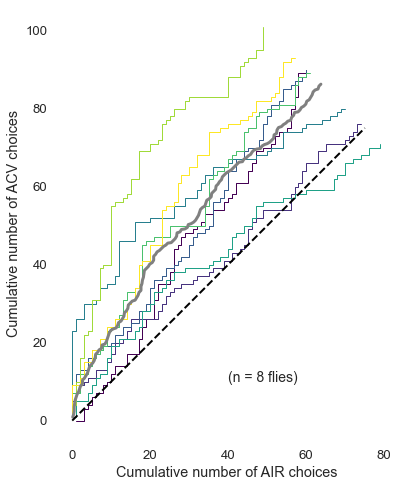

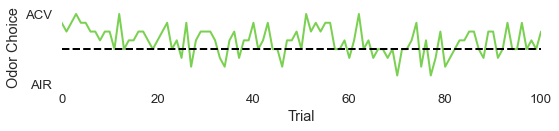

In [449]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(8):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/7),alpha=1,linewidth=1)
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray',label=f"Average")
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of AIR choices')
plt.ylabel('Cumulative number of ACV choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('ACVPreferenceTest.png',dpi=300,transparent=True)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["AIR","ACV"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('ACVPreferenceTest-schedules.png',dpi=300,transparent=True)
plt.show()

### Reversal Experiment

In [415]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_24_2022-10_35/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchUnlearningOctLearningTest-03_24_2022-11_32/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningAfterMCHUnlearningTest-03_24_2022-11_58/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']

In [416]:
histories1 = df1['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df1['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,1]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,1]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,1]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,2,1]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,2,1]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,2,1]]]], axis=0).transpose((2, 1, 0))

In [417]:
histories = np.concatenate([histories1, histories2, histories3], axis=1)
schedules = np.concatenate([schedules1, schedules2, schedules3], axis=1)

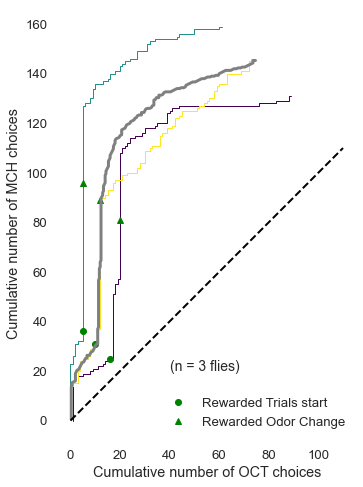

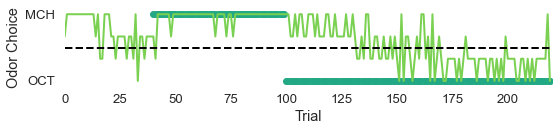

In [420]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(3):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/2),alpha=1,linewidth=1)
    plt.plot(np.cumsum(histories[n]==0)[40],np.cumsum(histories[n]==1)[40],'o',color='green')
    plt.plot(np.cumsum(histories[n]==0)[100],np.cumsum(histories[n]==1)[100],'^',color='green')
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray')
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,20,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.plot([],[],'o',color='green',label='Rewarded Trials start')
plt.plot([],[],'^',color='green',label='Rewarded Odor Change')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('ReversalLearningTest.png',dpi=300,transparent=True)
plt.show()

i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["OCT","MCH"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('ReversalLearningTest-schedules.png',dpi=300,transparent=True)
plt.show()

In [318]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-12_05/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']

In [333]:
import pandas as pd

In [367]:
latencies = []
columns = []
for i in os.listdir('//dm11/turnerlab/Rishika/4Y-Maze/RunData/'):
    loadmat_file = f"//dm11/turnerlab/Rishika/4Y-Maze/RunData/{i}/YArenaInfo.mat"
    frame_latency = np.diff(df1['TimeStampMatrix'][0][0].T[0][1:])
    # frame_latency = frame_latency[~np.isnan(frame_latency)]
    latencies.append(frame_latency)
    columns.append(i.split('-')[1]+'-'+i.split('-')[2])
fr = pd.DataFrame(1/np.array(latencies).T,columns=columns).dropna()
fr = fr.melt(var_name='Session',value_name='Frame Rate (Hz)')

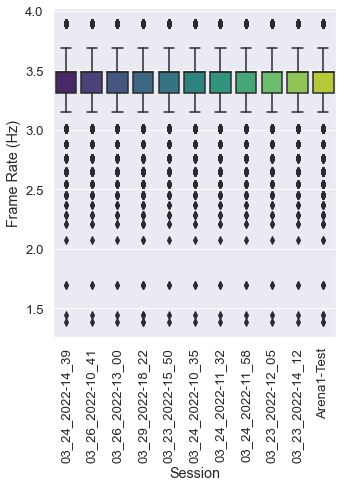

In [386]:
plt.figure(figsize=(5,7))
sns.set(style="ticks")
sns.set(font_scale=1.2)
sns.boxplot(x='Session',y='Frame Rate (Hz)',data=fr,palette=sns.color_palette("viridis", n_colors=11))
plt.xticks(rotation=90)
plt.ylabel('Frame Rate (Hz)')
plt.tight_layout()
plt.savefig('FrameRate.png',dpi=300,transparent=True)